### 특성 공학과 규제

여러개의 특성을 사용한 선형 회귀를 다중 회귀라 부른다.
특성이 2개면 타깃값과 함께 3차원 공간을 형성하고 선형 회귀 방정식
<br>타깃 = a x 특성1 + b * 특성2 + 절편 <br>
은 평면이 된다.
특성이 많은 고차원에서는 선형 회귀가 매우 복잡한 모델을 표현이 가능하다.
농어 길이 x 농어 높이 등 새로운 특성으로 만드는 것.
이렇게 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 특성 공학이라 부른다.




### 판다스
판다스는 유명한 데이터 분석 라이브러리이다. 데이터 프레임은 판다스의 핵심 데이터구조이다. 넘파이 배열과 비슷하게 다차원 배열을 다룰 수 있지만 훨씬 더 많은 기능을 제공한다.


In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv')
perch_full = df.to_numpy()
print(perch_full)

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
1000.0])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [7]:
# perch_full 과 perch_weight 를 훈련 세트와 테스트 세트로 나눈다

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full,
    perch_weight,
    random_state=42
)


### 사이킷 런의 변환기

사이킷런은 특성을 만들거나 전처리하기위한 다양한 클래스를 제공한다. 사이킷런에서는 이런 클래스를 변환기라고 부른다.

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()

poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


훈련을 해야 변환이 가능하다.

2개의 특성 원소를 가진 샘플이 6개의 특성을 가진 샘플로 변형되었다.



In [9]:
poly = PolynomialFeatures(include_bias=False)

poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


해당 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 곱한 항을 추가한다 .

무게 = a x 길이 + b x 높이 + c x 두께 + d x 1

<br>
선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있다 .
이렇게 놓고 보면 특성은 길이 높이 두께 , 1이 된다.
절편을 삭제하자


In [10]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)
# 9개의 특성이 어떻게 만들어 졌는지 확인하기
print(poly.get_feature_names_out())

test_poly = poly.transform(test_input)

(42, 9)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


### 다중 회귀 모델 훈련하기

다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같다.


In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


테스트 세트에 대한 점수는 높아지지 않았지만 과소 적합 문제는 더 이상 나타나지 않았다.

In [12]:
# 5제곱 까지 특성을 만들어 추가
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [13]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

print(lr.score(test_poly,test_target))


0.9999999999996433
-144.40579436844948


특성을 늘리면 선형 모델은 아주 강력해진다.
훈련세트에 대해 거의 완벽하게 학습이 가능하다.
하지만 이런 모델은 훈련세트에 너무 과대적합이 되므로 테스트 세트에서는 형편없는 점수를 만든다


### 규제

규제는 머신러닝 모델이 훈련세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다.
즉 모델이 훈련세트에 너무 과대적합하지 않도록 만드는 것이다. 선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일이다


In [37]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

ss.fit(train_poly)
# 표준 점수로 변환
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

print(train_scaled)
print(test_scaled)

[[-1.01339619 -1.01007487 -1.01952321 ... -0.76449499 -0.75967179
  -0.75143746]
 [-0.73842893 -0.75254307 -0.74466913 ... -0.73198449 -0.72731765
  -0.71950111]
 [-1.11650891 -0.98919391 -0.97371419 ... -0.76114089 -0.75592147
  -0.74734146]
 ...
 [-0.32597805 -0.51589222 -0.33238802 ... -0.65673421 -0.64237495
  -0.62509499]
 [ 1.55296488  1.65572732  1.17358328 ...  1.45958191  1.19906225
   0.95977016]
 [ 0.6936922   0.7717668   0.8987292  ...  0.3701756   0.40321427
   0.43089551]]
[[-2.29657672 -2.0645632  -1.95288184 -1.55255604 -1.46585499 -1.45227925
  -1.38306012 -1.36853915 -1.3414385  -1.16487216 -1.12766176 -1.12993021
  -1.09096504 -1.0919529  -1.08681842 -1.05473034 -1.05422049 -1.04733556
  -1.03445922 -0.95097661 -0.93581382 -0.94095847 -0.92003743 -0.92481854
  -0.9257405  -0.90344054 -0.9076728  -0.90768173 -0.90365223 -0.88585964
  -0.88933355 -0.8882214  -0.88265495 -0.87279092 -0.82345261 -0.81922614
  -0.82441462 -0.81401521 -0.81951597 -0.82223805 -0.80760074 -0

선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘라고 부른다.
릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고, 라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.

### 릿지 회귀
릿지는 계수를 제곱한 값을 기준으로 규제를 적용.

In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


0.9896101671037343
0.9790693977615387


릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절이 가능하다. 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절한다.
alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금더 과소적합되도록 유도한다.
alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.

### 사람이 직접 지정해야 하는 매개변수
알파값은 릿지 모델이 아니라 사람이 직접 지정해주어야 하는 값이다.
이를 하이퍼 파라미터라 한다.


In [26]:
import matplotlib.pyplot as plt

train_score = []
test_score =[]

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  ridge = Ridge(alpha= alpha)
  ridge.fit(train_scaled, train_target)

  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

이제 그래프를 그려보자 알파값을 0.001 부터 10배씩 늘려 보자 6개의 값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현하자.
-3 -2 가 되는 식

[0.001, 0.01, 0.1, 1, 10, 100]
[0.9930455252088248, 0.991780998125052, 0.9903815817570367, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]


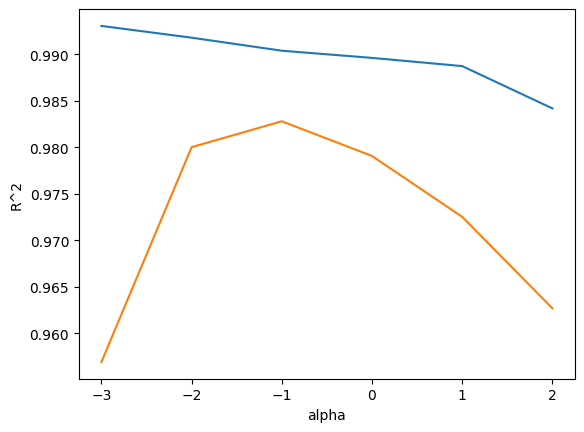

In [27]:
print(alpha_list)
print(train_score)

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

상단은 훈련 세트 그래프, 하단은 테스트 세트 그래프이다.
점수가 아주 크다.
훈련 세트에는 잘 맞고 테스트 세트에는 점수가 낮은 과대 적합의 전형적인 모습이다.

반대로 오른쪽은 둘다 점수가 낮아지는 과소 적합의 문제로 간다.

In [29]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


### 라쏘 회귀


라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.


In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [32]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  # 라쏘 모델, 클래스 선언
  lasso = Lasso(alpha=alpha, max_iter=10000)

  # 라쏘 모델 훈련
  lasso.fit(train_scaled, train_target)

  train_score.append(lasso.score(train_scaled, train_target))

  test_score.append(lasso.score(test_scaled, test_target))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


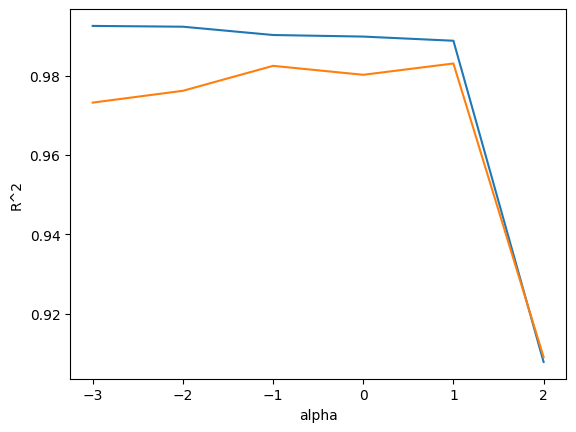

In [34]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()

해당 그래프도 좌측은 과대적합을 우측으로 갈수록 훈련 세트와 테스트 세트의 점수가 좁혀지고 있다.

가장 오른쪽은 점수가 크게 떨어진다.
과소 적합되는 모델이다.
라쏘 모델에서 최적의 값은 1 log10(N) 즉 10 지점이다.

이 값으로 다시 모델을 훈련시키자



In [35]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


특성을 많이 사용했지만 릿지와 마찬가지로 라쏘 모델이 과대적합을 억제하고 테스트세트의 성능을 크게 높였다.

라쏘 모델의 계수는 coef_에 저장도어 있다.
이중 0 인것을 헤아려 보자

In [36]:
print(np.sum(lasso.coef_ == 0))

40


np.sum 함수는 배열을 모두 더한 값을 반환한다.
넘파이에 비교 연산자 사용시 True 혹은 false를 반환한다.
True를 1로 False 를 0으로 인식하여 덧셈을 할 수 있기 때문에 마치 비교 연선저에 맞는 원소 개수를 헤아리는 효과를 낸다.

40개의 특성이 제외되었다.